<a href="https://colab.research.google.com/github/iramos02/bio108tutorial/blob/main/Visualizing_global_bird_biodiversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing global bird biodiversity

**Background**

Birds are an ideal study species as they are a well documented and well studied organism, thus typically there are a lot of datasets we can work with. With the rise of citizen science programs such as iNaturalist, there also has been an increase in the amount of bird documentations that are publically available.

Moreover, as many of us know we are currently living in a biodiversity crisis. Due to various anthropogenic factors many species, including birds are declining globally. Thus, birds can be used as a good indicator species as well as a model organism that we can use to analyze changes in global biodiversity.  


Learning Objectives:

*   Understand why raster data can be useful for investigating and answering conservation questions
*   Learn how to run simple analyses using raster data












# What is raster data?

Raster data consists of cells/pixels that are organized into a grid. Each cell/pixel contains a value representing information. This could range from temperature, to precipitation, to topographic map features ... to species diversity!

Overall, raster data is really useful for helping visualize
information.

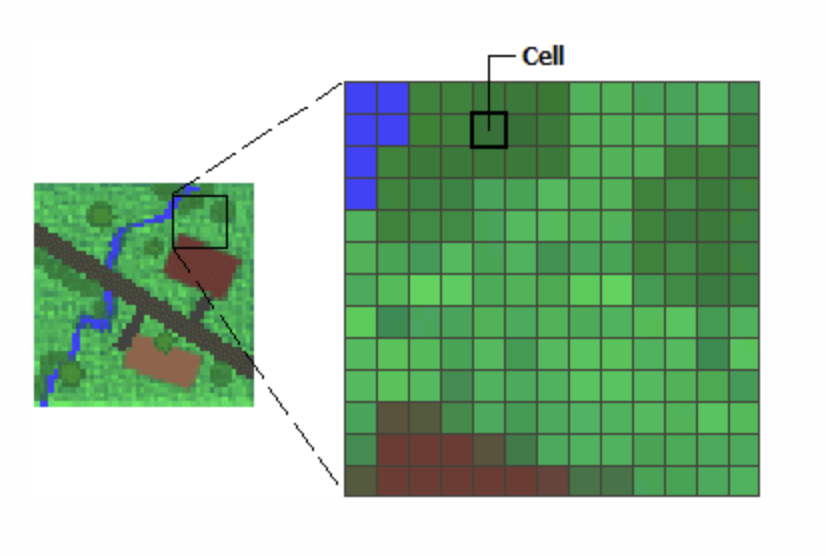



**Past literature**

In Harfoot et al. the authors used raster data to map threats to terrestrial vertebrates at global scale.

Some of their main findings include --


*   Agriculture and logging are most common in the tropics and hunting and trapping is the most geographically widespread threat to mammals and birds.

* Human threats to ecosystems are vastly underestimated, especially in high biodiversity areas.

* Sumatra, Borneo, and Madagascar, are highly impacted by all threats across all taxa.

* Across all taxa, agriculture was the threat most impacting species, followed by hunting/trapping and logging.


Citation:

Harfoot, M.B.J., Johnston, A., Balmford, A. et al. Using the IUCN Red List to map threats to terrestrial vertebrates at global scale. Nat Ecol Evol 5, 1510–1519 (2021). https://doi.org/10.1038/s41559-021-01542-9

This article is a good example of how we can use raster data to ask and answer conservation questions and explore similar questions we will encounter in our tutorial today!



**Using raster data the main questions I will be addressing in this tutorial are:**


1.   What areas of the world have the highest species richness of birds?
2.   Which areas in the world are of particular concern for bird species?

First lets install the necessary libraries

```
#for plotting and interacting with raster data
! pip install rasterio fiona #needed to import raster data
! pip install rasterstats
#needed for interactive maps
! pip install -U leafmap
! pip install fiona
! pip install folium matplotlib mapclassify
! pip install localtileserver
! pip install rasterio

```


In [ ]:
# for plotting and interacting with raster data
! pip install rasterio fiona #needed to import raster data
! pip install rasterstats
# needed for interactive maps
! pip install -U leafmap
! pip install fiona
! pip install folium matplotlib mapclassify
! pip install localtileserver
! pip install rasterio

Install other libraries:

Next, we have to install other libraries that will be helpful in todays analyses. These libraries will allow us to import, analyze, and visualize our data!

```
##install all other necessary packages
import rasterio # for writing and reading raster data
import rasterio.plot #for plotting raster data
import geopandas as gpd #for handling vector data
import numpy as np #for array manipulations
import matplotlib.pyplot as plt #for plotting and visualizing data
from osgeo import gdal
import leafmap #for visualizing data in interactive maps

#to help work with our rastser data
from rasterio import open as rio_open
from shapely.geometry import mapping
import rasterio.mask
import rasterio.features
import rasterstats
from rasterio.mask import mask
from rasterio.warp import reproject, Resampling
from rasterio.crs import CRS
from rasterio.windows import Window
```

**IUCN redlist data**

The International Union for Conservation of Nature’s (IUCN) Red List of Threatened Species was created in 1964 and is now one of the most comprehensive resource for tracking the global conservation status of animal, fungi and plant species.

The IUCN Red List provides information about range, population size, habitat and ecology, threats, and conservation actions that will help inform necessary conservation decisions.

The IUCN has different categories for classifying species


1.   Data Deficient (DD)
2.   Least Concern (LC)
3. Near Threatened (NT)
4. Vulnerable (VU)
5. Endangered (EN)
6. Critically Endangered (CR)
7. Extinct in the Wild (EW)
8. Extinct (EX)


The IUCN has raster datasets available tracking the Species Richness and Rarity-Weighted Richness for Amphibians, Birds, Mammals and Reptiles from 2017, 2021, 2022, 2023, and 2024!


*   **Species Richness** is a count of the number of species in an area

*   **Rarity-Weighted Richness** is the aggregate importance of each grid cell to the species occuring there. The value does not have any units, but indicates relative importance.

The IUCN has made two datasets per year -- One tracks all species regardless of their red list status while the other tracks threatened species which is defined as species that are Critically Endangered, Endangered, and Vulnerable.






## Import our raster data!

Now, we have to import our raster data. I did this by downloading .tif files from the IUCN red list

I have uploaded the files we will need for our analyses today into a github repository to streamline our workflow.

Read in our raster data:

Now we have to read in our downloaded raster data.
We will use the rasterio.open() function which creates a connection to the file without loading the entire dataset into memory.

```
##reading in first raster data for all bird species data
raster_path1 = (
    "https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_SR_2024.tif"
)
src1 = rasterio.open(raster_path1)
print(src1)

##reading in second raster data for threatened bird species
raster_path2 = (
    "https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_THR_SR_2024.tif"
)
src2 = rasterio.open(raster_path2)
print(src2)
```

Checking Metadata:

Before working with your raster data, its good to know the units and/or dimensions you're working with.

```
#checking metadata
src1.meta
```

In [ ]:
#checking src1 metadata

In [ ]:
#checking src2 metadata

# Visualizing our data

Now we can easily visualize our data using rasterio.plot.show()

In [ ]:
##visualizing our first raster data for all bird species richness globally


In [ ]:
##visualizing our second raster data for threatened bird species richness globally


In [ ]:
## we can add titles to our plots using various functions in rasterio and also set and adjust plot sizes
fig, ax = plt.subplots(figsize=(8, 8)) ##adjust as needed
rasterio.plot.show(src1, title="All Species Richness 2024")

In [ ]:
##adding title to second plot
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src2, title="Threatened Species Richness 2024")


We can also use matplotlib to create a figure with both subplots and also add a colormap (cmap) and colorbars for better visualization!

An example of what this could look like is below:

```
##set figure axes rows, columns, and figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

##Plot first raster (All Species Richness)
im1 = rasterio.plot.show(src1, ax=axes[0], cmap="viridis")
axes[0].set_title("All Species Richness")

# Plot second raster (Threatened Species Richness)
im2 = rasterio.plot.show(src2, ax=axes[1], cmap="viridis")
axes[1].set_title("Threatened Species Richness")

# Add colorbars
fig.colorbar(im1.get_images()[0], ax=axes[0], label="Richness", shrink=0.2)
fig.colorbar(im2.get_images()[0], ax=axes[1], label="Richness", shrink=0.2)

plt.show()
```


Discussion Questions:



1.   What do you notice about total bird species richness distribution?
2.  What do you notice about threatened bird species richness distribution?
2.   Which areas are of particular concern?
3. What are some conservation applications that can come from being able to visualize data such as this?



## Interactive Maps

We can also create interactive maps using leafmaps!

Using leafmaps, you can create a map that you can add your own polygons, points, lines, and also zoom in and out of certain areas

```
# Create an interactive map for all bird species richness 2024
m = leafmap.Map(center=[0, 0], zoom=2)  # Adjust center and zoom as needed

# load raster in
raster1 = "https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_SR_2024.tif"


# Add colormap
m.add_raster(raster1, colormap="viridis", layer_name="All Species Richness")


# Display the map
m
```

**Species Rarity-Weighted Richness**

The IUCN also has raster data for species rarity-weighted richness

"For each species the Rarity-Weighted Richness value for a cell is the proportion of the species' range contained within that cell. This can be the area of the pixel divided by the area of the species' range or (as in these analyses) 1 divided by the total number of cells overlapped by that species' range. These values are summed across all the species in the particular analysis to give the relative importance of each cell to the species found there.



For species with different breeding and non-breeding ranges, where a cell is contained in both ranges, the calculation is based on the smaller range, i.e. the season in which that area is more important." -IUCN WEBSITE

Lets load in and look at this data!

In [12]:
##reading in first raster data species rarity richness data for all birds
raster_path3 = (
    "https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_RWR_2024.tif"
)
src3 = rasterio.open(raster_path3)
print(src3)

<open DatasetReader name='https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_RWR_2024.tif' mode='r'>


In [13]:
##reading in raster data species rarity richness data for threatened birds
raster_path4 = (
    "https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_THR_RWR_2024.tif"
)
src4 = rasterio.open(raster_path4)
print(src4)

<open DatasetReader name='https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_THR_RWR_2024.tif' mode='r'>


**Skill check:**

Using skills and techniques we've covered in this tutorial, create your own code for visualizing this data

In [ ]:
# write your code here!


**Manipulating raster data:**

Using the raster data we currently have, we can perform calculations to ask and answer a variety of conservation questions.

I'm particularly interested in visualizing the ratio of threatened species to all species on a map!

We can do this by calculating the ratio of threated species to all species for each pixel in a raster.

```
#To avoid division by zero, if all species is 0 we assign it as np.nan
species_ratio = np.where(all_species > 0, threatened_species / all_species, np.nan)

```
Using this calculation, we can then visualize our new map!!

```
all_species = src1.read(1)
threatened_species = src2.read(1)
species_ratio = np.where(all_species > 0, threatened_species / all_species, np.nan)


plt.figure(figsize=(10, 10))
plt.imshow(species_ratio, cmap="viridis", interpolation="nearest", vmin=0, vmax= 1)
plt.colorbar(label="Threatened / All Species Ratio", shrink = 0.5)
plt.title("Threatened Species Richness Ratio")
plt.axis("off")
plt.show()
```



In [ ]:
#plot figure here


Through this new visualization, we can see parts of the world that have a higher proportion of threatened species.

Specifically, we can see parts of Northern Africa seem to have a higher proportion of threatened species.

To better understand which countries these are, we can overlay country boundaries on top of this using vector data.

Vector data: one of the main types of geographic data used in GIS (Geographic Information Systems), and it includes points, lines, and polygons.

I found a GeoJSON file on Github of the boundaries of countries in the Middle East and Northern Africa that we will use:

```
af_bounds = "https://github.com/wjdanalharthi/MENA_GeoJSON/raw/refs/heads/master/MENA.geo.json"
```

In order to accurately layer this vector onto our map, we must make sure they are both on the same coordinate system. First we load in our vector data as a geo data frame using geopandas. Then, we have to reproject the geodataframe into same coordinate reference systems (crs) as your raster file (src1)

```
af_bounds = (
    "https://github.com/wjdanalharthi/MENA_GeoJSON/raw/refs/heads/master/MENA.geo.json"
)
gdf = gpd.read_file(af_bounds) ## read in the file as geographic data
gdf = gdf.to_crs(src1.crs)
```

In [15]:
#reading in vector data ans converting it to the same coordinate as our raster data

In [ ]:
## now that both our vector and raster data are in the same coordinates, we can plot them both
with rasterio.open("https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_SR_2024.tif") as src1, rasterio.open("https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_THR_SR_2024.tif") as src2:
    all_species = src1.read(1)
    threatened_species = src2.read(1)
    species_ratio = np.where(all_species > 0, threatened_species / all_species, np.nan)
    transform = src1.transform  #


# Load the GeoJSON
af_bounds = (
    "https://github.com/wjdanalharthi/MENA_GeoJSON/raw/refs/heads/master/MENA.geo.json"
)
gdf = gpd.read_file(af_bounds)
gdf = gdf.to_crs(src1.crs)

# Plotting
fig, ax = plt.subplots(figsize=(20, 20))

#plot our species ration raster
rasterio.plot.show(species_ratio, transform=transform, cmap="viridis", vmin=0, vmax=1, ax=ax)

# Overlay the GeoJSON
gdf.boundary.plot(ax=ax, color="red", facecolor="none", lw=2)

# add other plot elements
plt.title("Threatened Species Richness Ratio")
plt.axis("off")
cbar = plt.colorbar(ax.images[0], ax=ax, label="Threatened / All Species Ratio", shrink = 0.5)
plt.show()




Since we only want to focus on a portion of the map, we can also do an analysis to only visualize a portion of our raster by defining a window

```
Window(col_off, row_off, width, height)
 ```

 col_off = starting column

 row_off = starting row

 width: how many columns to read

 height: how many rows to read


In [ ]:
# Making a plot only looking at a certain window of our species_ratio raster
with rasterio.open("https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_SR_2024.tif") as src1, rasterio.open("https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_THR_SR_2024.tif") as src2:
    all_species = src1.read(1)
    section = src1.read(window=Window(450, 100, 400, 200)) ##defining our window
    #section is now a numpy containing pixel values from that window of the raster
    threatened_species = src2.read(1)
    section2 = src2.read(window=Window(450, 100, 400, 200))
    species_ratio = np.where(section > 0, section2 / section, np.nan)


# Plotting
fig, ax = plt.subplots(figsize=(20, 20))

#plotting raster
rasterio.plot.show(species_ratio, transform=transform, cmap="viridis", vmin=0, vmax=1, ax=ax)


# add other plot elements
plt.title("Threatened Species Richness Ratio")
plt.axis("off")
cbar = plt.colorbar(ax.images[0], ax=ax, label="Threatened / All Species Ratio", shrink = 0.5)
plt.show()

**Conclusions:**

Through this tutorial, I hope you've gotten more comfortable reading in and doing simple analyses with raster data to answer conservation questions!

There are countless analyses we could do using this data, and this tutorial only shows a few of them :)
